<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.267980,26.930096,-0.022124,59.175952,59.195615,-0.019663
1,0.0,1.0,23.093945,60.200658,-0.006251,93.288353,93.295234,-0.006881
2,0.0,2.0,85.268068,26.213230,-0.035476,121.445823,121.478130,-0.032307
3,0.0,3.0,26.868020,44.729373,-0.000433,81.596961,81.596544,0.000417
4,0.0,4.0,84.505101,82.809138,0.007896,177.322134,177.316351,0.005783
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.377528,31.231256,0.000132,92.608916,92.614797,-0.005880
59996,999.0,56.0,68.435483,49.106272,-0.005419,127.536336,127.544628,-0.008292
59997,999.0,57.0,91.646395,74.319994,0.006637,175.973026,175.964871,0.008155
59998,999.0,58.0,50.978802,59.138695,-0.012421,120.105076,120.119790,-0.014714


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.267980,26.930096,-0.022124,59.175952,59.195615,-0.019663
1,0.0,1.0,23.093945,60.200658,-0.006251,93.288353,93.295234,-0.006881
2,0.0,2.0,85.268068,26.213230,-0.035476,121.445823,121.478130,-0.032307
3,0.0,3.0,26.868020,44.729373,-0.000433,81.596961,81.596544,0.000417
4,0.0,4.0,84.505101,82.809138,0.007896,177.322134,177.316351,0.005783
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.377528,31.231256,0.000132,92.608916,92.614797,-0.005880
59996,999.0,56.0,68.435483,49.106272,-0.005419,127.536336,127.544628,-0.008292
59997,999.0,57.0,91.646395,74.319994,0.006637,175.973026,175.964871,0.008155
59998,999.0,58.0,50.978802,59.138695,-0.012421,120.105076,120.119790,-0.014714


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.267980  26.930096 -0.022124   59.175952   59.195615 -0.019663
      1.0    23.093945  60.200658 -0.006251   93.288353   93.295234 -0.006881
      2.0    85.268068  26.213230 -0.035476  121.445823  121.478130 -0.032307
      3.0    26.868020  44.729373 -0.000433   81.596961   81.596544  0.000417
      4.0    84.505101  82.809138  0.007896  177.322134  177.316351  0.005783
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.377528  31.231256  0.000132   92.608916   92.614797 -0.005880
      56.0   68.435483  49.106272 -0.005419  127.536336  127.544628 -0.008292
      57.0   91.646395  74.319994  0.006637  175.973026  175.964871  0.008155
      58.0   50.978802  59.138695 -0.012421  120.105076  120.119790 -0.014714
      59.0   50.109065  74.391371  0.001991  134.502427  134.500725  0.001702

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.267980  26.930096 -0.022124   59.175952   59.195615 -0.019663
      1.0    23.093945  60.200658 -0.006251   93.288353   93.295234 -0.006881
      2.0    85.268068  26.213230 -0.035476  121.445823  121.478130 -0.032307
      3.0    26.868020  44.729373 -0.000433   81.596961   81.596544  0.000417
      4.0    84.505101  82.809138  0.007896  177.322134  177.316351  0.005783
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.377528  31.231256  0.000132   92.608916   92.614797 -0.005880
      56.0   68.435483  49.106272 -0.005419  127.536336  127.544628 -0.008292
      57.0   91.646395  74.319994  0.006637  175.973026  175.964871  0.008155
      58.0   50.978802  59.138695 -0.012421  120.105076  120.119790 -0.014714
      59.0   50.109065  74.391371  0.001991  134.502427  134.500725  0.001702

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.267980,26.930096,-0.022124,59.175952,59.195615,-0.019663
1,0.0,1.0,23.093945,60.200658,-0.006251,93.288353,93.295234,-0.006881
2,0.0,2.0,85.268068,26.213230,-0.035476,121.445823,121.478130,-0.032307
3,0.0,3.0,26.868020,44.729373,-0.000433,81.596961,81.596544,0.000417
4,0.0,4.0,84.505101,82.809138,0.007896,177.322134,177.316351,0.005783
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.377528,31.231256,0.000132,92.608916,92.614797,-0.005880
59996,999.0,56.0,68.435483,49.106272,-0.005419,127.536336,127.544628,-0.008292
59997,999.0,57.0,91.646395,74.319994,0.006637,175.973026,175.964871,0.008155
59998,999.0,58.0,50.978802,59.138695,-0.012421,120.105076,120.119790,-0.014714


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.267980  26.930096 -0.022124   59.175952   59.195615 -0.019663
      1.0    23.093945  60.200658 -0.006251   93.288353   93.295234 -0.006881
      2.0    85.268068  26.213230 -0.035476  121.445823  121.478130 -0.032307
      3.0    26.868020  44.729373 -0.000433   81.596961   81.596544  0.000417
      4.0    84.505101  82.809138  0.007896  177.322134  177.316351  0.005783
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.377528  31.231256  0.000132   92.608916   92.614797 -0.005880
      56.0   68.435483  49.106272 -0.005419  127.536336  127.544628 -0.008292
      57.0   91.646395  74.319994  0.006637  175.973026  175.964871  0.008155
      58.0   50.978802  59.138695 -0.012421  120.105076  120.119790 -0.014714
      59.0   50.109065  74.391371  0.001991  134.502427  134.500725  0.001702

[60000 rows x 6 columns]

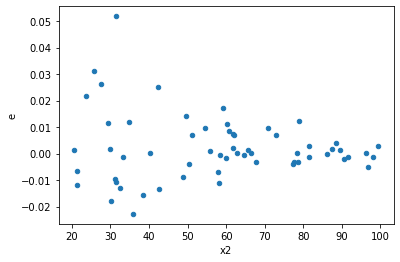

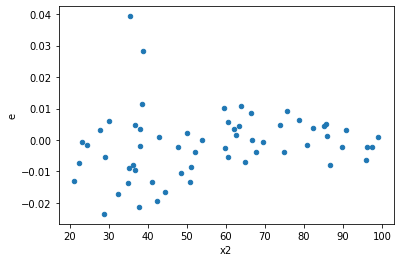

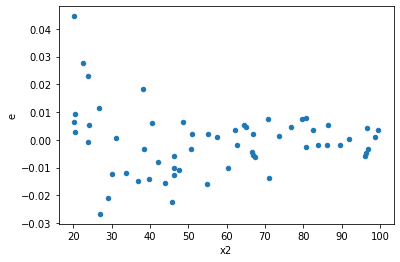

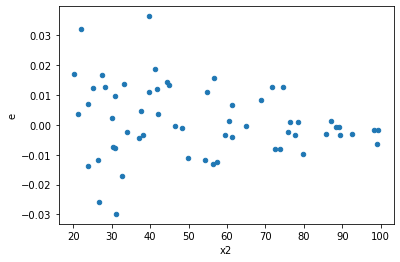

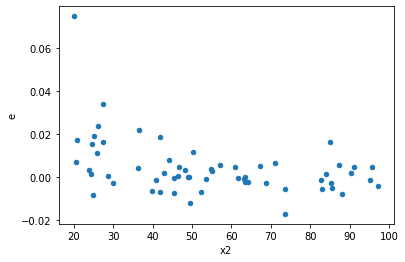

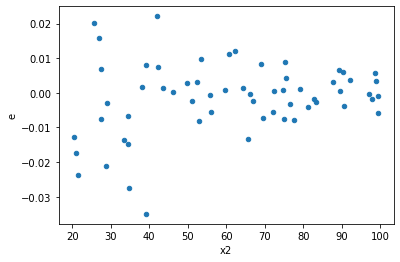

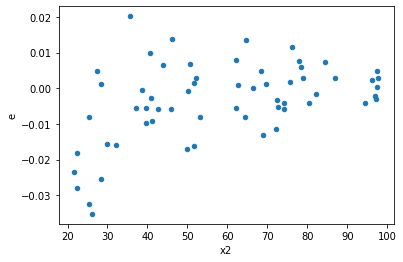

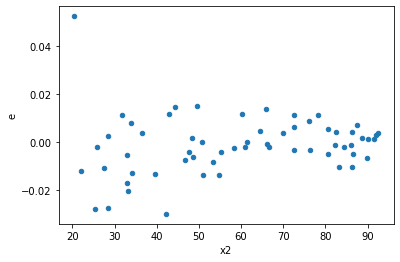

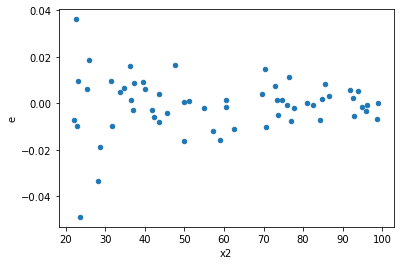

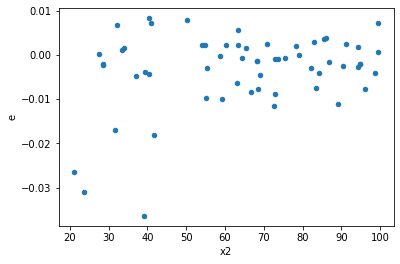

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.0049800411324940974,0.0008731505597022239,0.00022636550602245898,3.9688661804646536e-05,0.17532998954667944,0.0001330859521297339,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.008364548418462176,0.0006855517939090371,0.00038020674629373526,3.11614451776835e-05,0.0819592116169585,1.6216008332285484e-07,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.00947146704628437,0.00040192622705145705,0.00043052122937656224,1.826937395688441e-05,0.04243547753345472,2.454603019716572e-10,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.0060912813294749036,0.0006911583268022336,0.0002768764240670411,3.141628758191971e-05,0.11346682075868175,3.267121762409304e-06,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.0028381604517665397,0.0006981123353889917,0.00012900729326211543,3.1732378881317806e-05,0.2459735266039909,0.0017292349923977626,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.005978543540417931,0.0006870086545859546,0.000271751979109906,3.122766611754339e-05,0.11491237789629431,3.659038679881131e-06,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.004583230419104062,0.0004979808545302649,0.000208328655413821,2.2635493387739314e-05,0.10865280795278258,2.2116790853404257e-06,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,0.003994512275189333,0.0005368114349000897,0.0001815687397813333,2.4400519768185896e-05,0.13438722875739462,1.4483919541915075e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.004730330050864009,0.0004570087178985771,0.0002150150023120004,2.0773123540844414e-05,0.09661243781818207,7.561613967237388e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    995
Reject005=1 : Homoscedasticity        5
Name: Result_test, dtype: int64